# Country Risk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Load data

In [2]:
filename = 'countryriskdata.csv'
data = pd.read_csv(filename, skiprows = 0)
data.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,39,1.867,3.822,3.403
1,Algeria,DZ,34,2.213,4.160,4.202
2,Argentina,AR,36,1.957,4.568,-2.298
3,Armenia,AM,33,2.218,4.126,0.208
4,Australia,AU,79,1.465,8.244,2.471


In [3]:
raw = data.iloc[:,2:]
print(raw[:5])

   Corruption  Peace  Legal  GDP Growth
0          39  1.867  3.822       3.403
1          34  2.213  4.160       4.202
2          36  1.957  4.568      -2.298
3          33  2.218  4.126       0.208
4          79  1.465  8.244       2.471


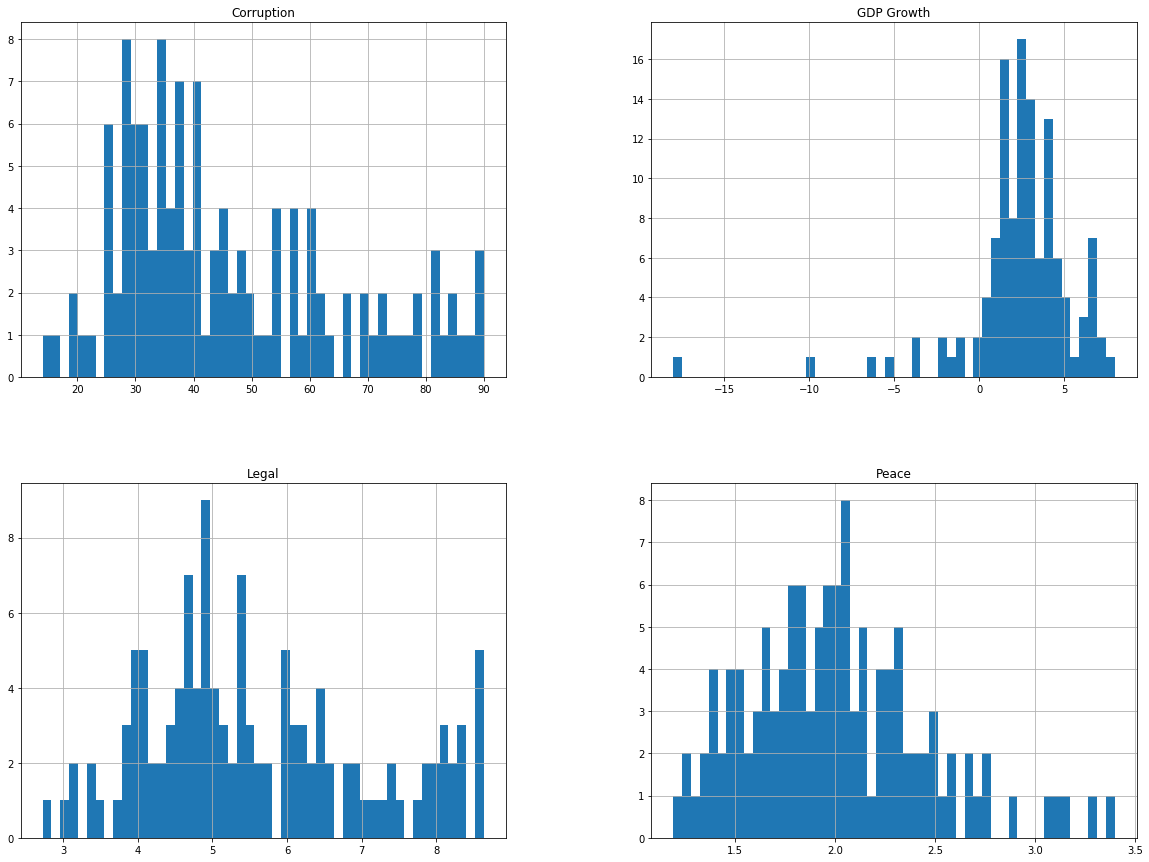

In [4]:
%matplotlib inline
raw.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


##  Since "Corruption" and "Legal" are highly correlated, we drop the Courrption variable

## K-Means

In [6]:
# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [7]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.305319 -1.194666    0.317896
1  0.467304 -0.967413    0.564392
2 -0.104348 -0.693096   -1.440899
3  0.478469 -0.990273   -0.667782
4 -1.202990  1.778450    0.030368


## Elbow Method

In [8]:
inertia = []
K = range(1,10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(X)
    inertia.append(kmeansModel.inertia_)

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


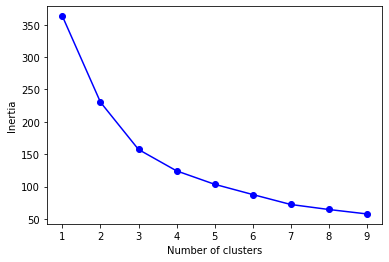

In [9]:
fig = plt.figure()
plt.plot(K, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## K-Means with k=3

In [10]:
myK = 3
kmeans = KMeans(n_clusters=myK, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [11]:
# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

inertia for k=3 is 157.3166175732171
cluster centers:  [[ 2.65685249e-01 -4.51167794e-01  3.63120857e-01]
 [-9.69783061e-01  1.17216616e+00  1.73192818e-03]
 [ 1.39208980e+00 -1.04170733e+00 -1.79449174e+00]]


In [12]:
y = kmeans.labels_
print("cluster labels: ", y)

cluster labels:  [0 0 2 0 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 0 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 2 0 0
 0 2 1 1 1 1 2 0 2 0 0]


## Silhouette Diagram

In [13]:
silhouette_avg = silhouette_score(X, y)
print("For n_clusters =", myK, "\n"
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 
The average silhouette_score is : 0.38757393707048954


In [14]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, y)

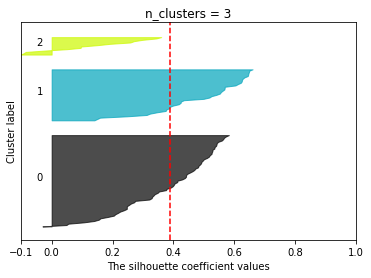

In [15]:
y_lower = 10

ax = plt.gca()

# The silhouette coefficient can range from (-1, 1) but in this example all lie within [-0.1, 1]
ax.set_xlim([-0.1, 1])

# The (n_clusters + 1) * 10 is for inserting blank space between silhouette plots of individual clusters
# to demarcate them clearly.
ax.set_ylim([0, len(X) + (myK + 1) * 10])


for i in range(myK):
    
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / myK)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("n_clusters = %d" % myK)
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")


# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

## 2D Visualization

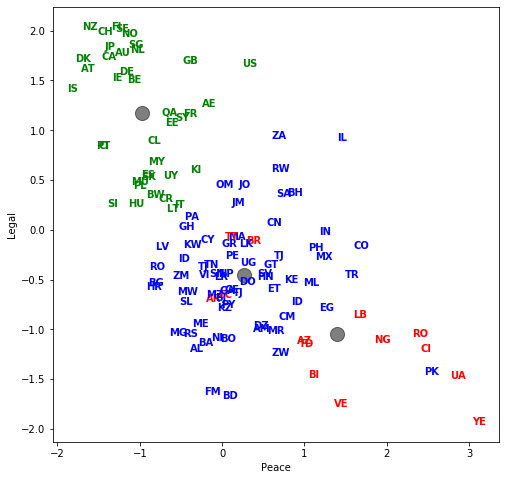

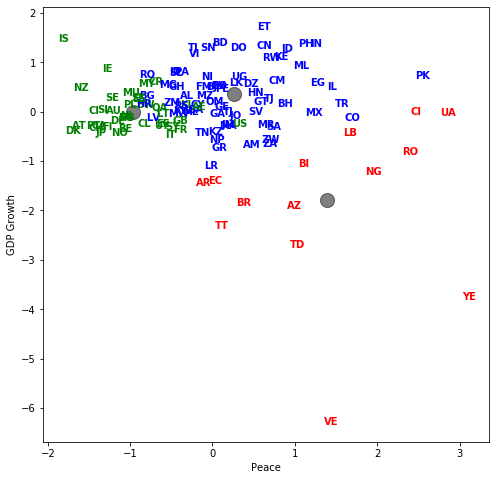

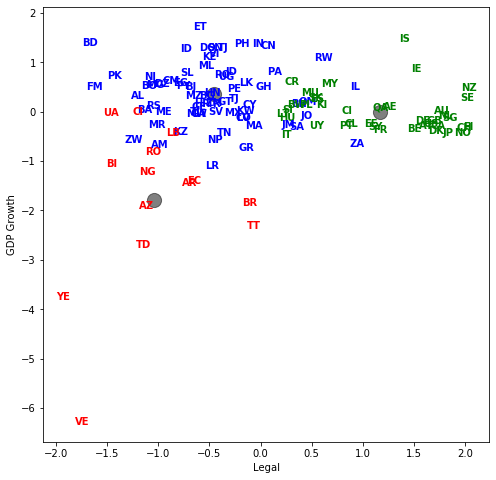

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue', 'green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], data['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [17]:
data['Country'].iloc[y==2]

2                         Argentina
6                        Azerbaijan
14                           Brazil
16                          Burundi
19                             Chad
27     Democratic Republic of Congo
30                          Ecuador
60                          Lebanon
78                          Nigeria
90                           Russia
108             Trinidad and Tobago
112                         Ukraine
117                       Venezuela
119                           Yemen
Name: Country, dtype: object

In [18]:
data['Country'].iloc[y==1]

4                 Australia
5                   Austria
9                   Belgium
13                 Botswana
18                   Canada
20                    Chile
23               Costa Rica
26           Czech Republic
28                  Denmark
33                  Estonia
35                  Finland
36                   France
39                  Germany
44                  Hungary
45                  Iceland
49                  Ireland
51                    Italy
53                    Japan
57            Korea (South)
62                Lithuania
65                 Malaysia
68                Mauritius
75              Netherlands
76              New Zealand
79                   Norway
86                   Poland
87                 Portugal
88                    Qatar
96                Singapore
97                 Slovakia
98                 Slovenia
100                   Spain
102                  Sweden
103             Switzerland
104                  Taiwan
113    United Arab E

In [19]:
data['Country'].iloc[y==0]

0         Albania
1         Algeria
3         Armenia
7         Bahrain
8      Bangladesh
          ...    
110        Turkey
111        Uganda
118       Vietnam
120        Zambia
121      Zimbabwe
Name: Country, Length: 69, dtype: object

## Silhouette Score

In [20]:
silhouette_score(X, y)

0.38757393707048954

### Note that Silhouette Score doesn't work for k = 1

In [21]:
Silhouette = []
KK = range(2,10)
for k in KK:
    myModel = KMeans(n_clusters=k)
    myModel.fit(X)
    score = silhouette_score(X, myModel.labels_)
    Silhouette.append(score)

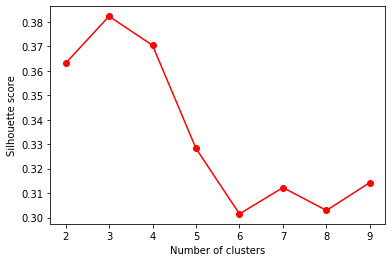

In [22]:
fig = plt.figure()
plt.plot(KK, Silhouette, '-ro')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

## Silhouette Diagram

In [23]:
N = len(KK)

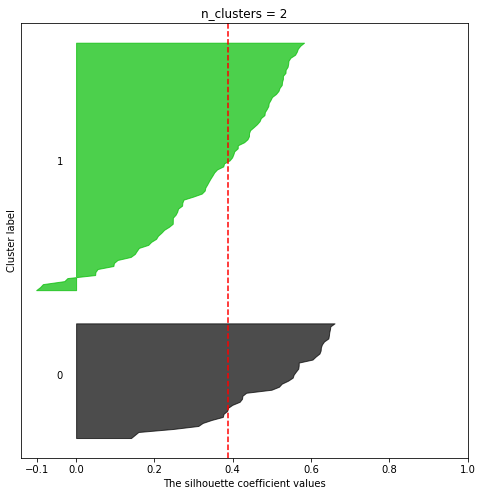

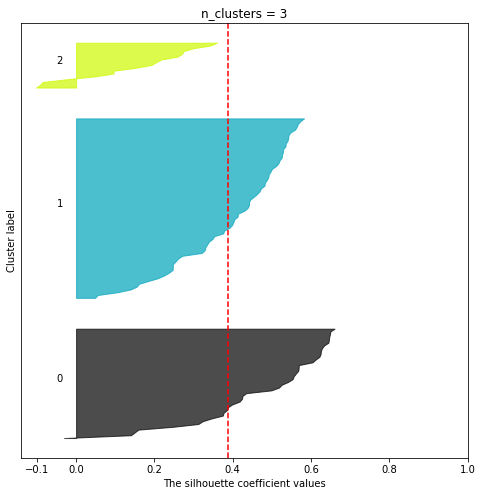

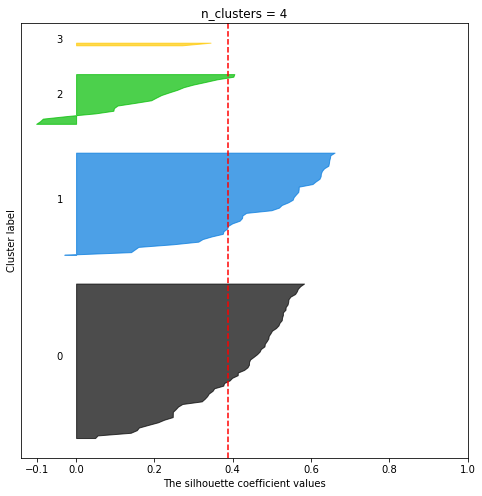

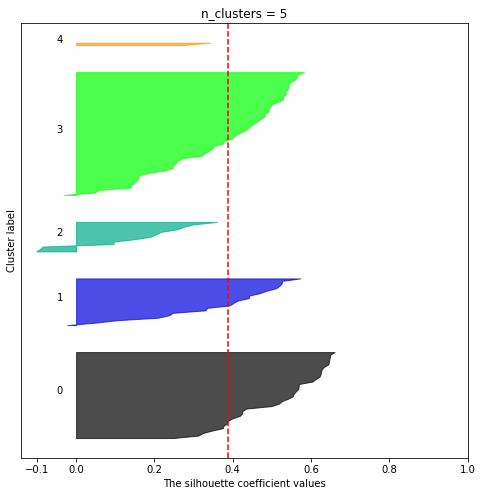

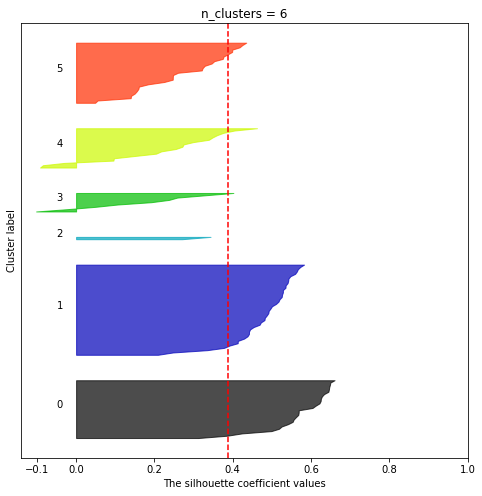

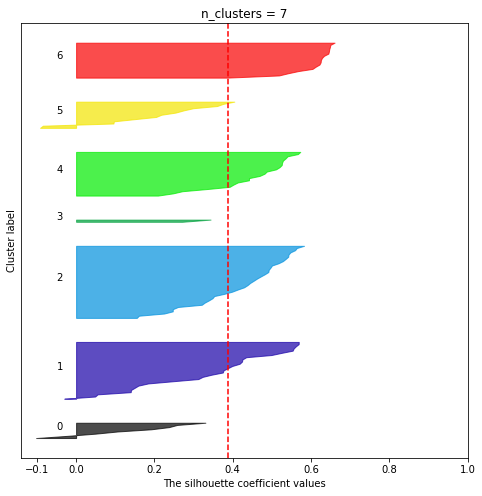

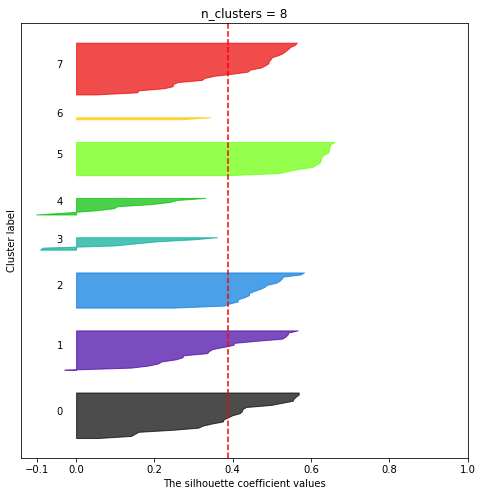

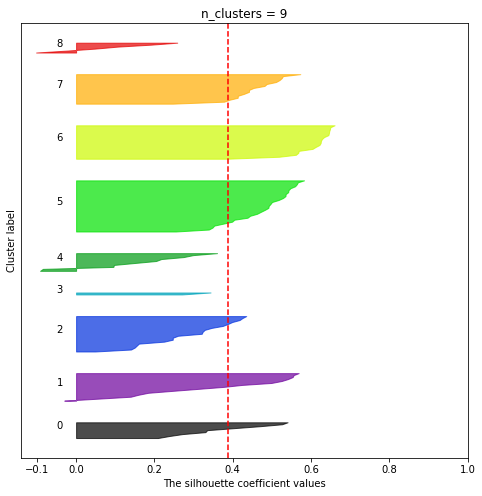

In [24]:
for j in range(N):
    n_clusters = KK[j]
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    fig = plt.figure(j, figsize=(8, 8))
    ax = plt.gca()
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("n_clusters = %d" % n_clusters)
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")


    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
plt.show()